CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.34 µs


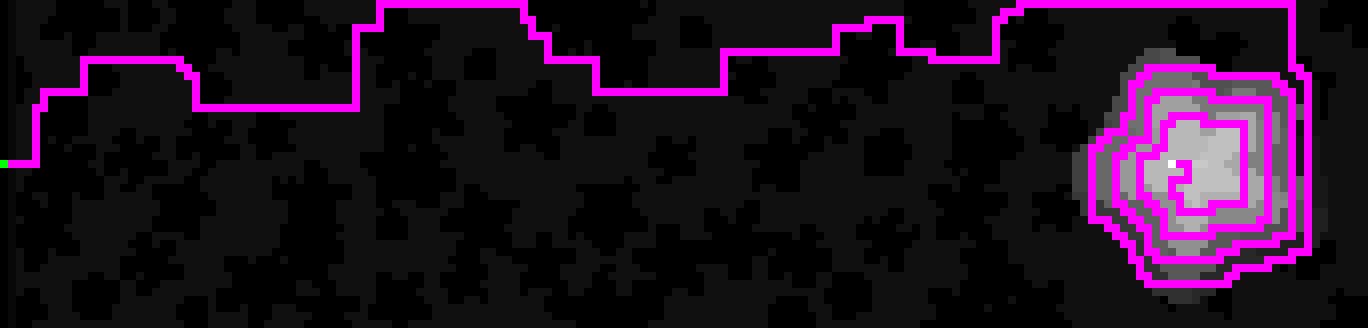

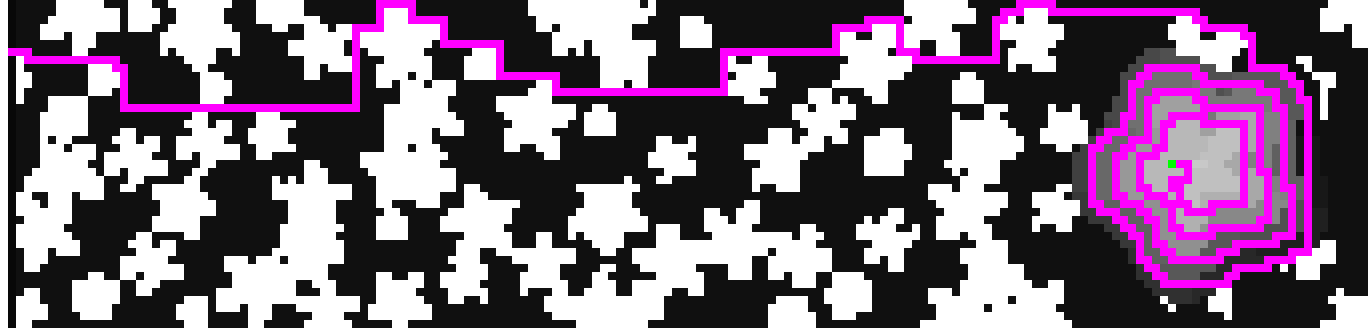

part1: 520 520
part2: 508 508


In [1]:
%time
import numpy as np
from PIL import Image
from IPython import display
import cv2

def pretty(M,w,h,t,xs,ys,tgt):
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for x,y in M.keys():
        v=M[(x,y)]
        pix[y,x,:]=(ord(v)-ord('a'))*8
    
    for x,y in t:
        pix[y,x,:]=[255,0,255]
    
    pix[ys,xs,:]=[0,255,0]
    
    
    for x,y in M.keys():
        if (x,y) in tgt:
            pix[y,x,:]=[255,255,255]
    
    #pix=pix[:200,:100,:]
    F=8
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    #display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))


def d(x0,y0,x1,y1):
    
    return abs(x0-x1)+abs(y0-y1)


def dist(xs,ys,tgt,M,w,h,up):
    #print(M) 
    past={}
    
    e=[((xs,ys),[])]
        
    while len(e):
        p,t=e[0]
        e=e[1:]
        #print(p)
        if p in past:
            continue
        
        if p in tgt:
            #render path
            pretty(M,w,h,t,xs,ys,tgt)
            #print(t)
            return len(t)
        
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            x,y=p
            xx=x+dx
            yy=y+dy
            p2=(xx,yy)
            if p2 not in past:
                if p2 in M:
                    alwd=0
                    step=ord(M[p2])-ord(M[p])
                    if up and step <= 1:
                        alwd=1
                    elif not up and step >= -1:
                        alwd=1
                    if alwd:
                        e.append((p2,t+[p]))
                
        e=sorted(e,key=lambda x: len(x[1]),reverse=False)
        past[p]=1

def p():
    m=[[c for c in l] for l in open('12.txt').read().split('\n')]
    h=len(m)
    w=len(m[0])
    xs,ys=(-1,-1)
    M={}
    aes=[]
    for y in range(h):
        for x in range(w):
            if m[y][x] == 'S':
                xs=x
                ys=y
                m[y][x]='a'
                
            elif m[y][x] == 'E':
                xe=x
                ye=y
                m[y][x]='z'
            if m[y][x]=='a':
                aes.append((x,y))
            M[(x,y)]=m[y][x]
    #print(aes)
    a=dist(xs,ys,[(xe,ye)],M,w,h,1)
    b=dist(xe,ye,aes,      M,w,h,0)
    return a,b
   
    
a,b=p()
print('part1:',a,520)
print('part2:',b,508)

    
    